In [1]:
import pandas as pd
import numpy as np
from pprint import pprint
from nanoHUB.application import Application
from nanoHUB.configuration import ClusteringConfiguration
from nanoHUB.pipeline.geddes.data import get_default_s3_client
from nanoHUB.dataaccess.lake import S3FileMapper
from nanoHUB.clustering.infra import create_clusters_repository, get_user_tools, add_cluster_info, get_clustered_one_day_users, get_unclassified_one_day_users
from ast import literal_eval
from collections import defaultdict


pd.set_option('display.max_columns', None)

# logger.debug('Testing')
application = Application.get_instance()
nanohub_db = application.new_db_engine('nanohub')

#salesforce = application.new_salesforce_engine()

s3_client = get_default_s3_client(application)
raw_mapper = S3FileMapper(s3_client, ClusteringConfiguration().bucket_name_raw)
processed_mapper = S3FileMapper(s3_client, ClusteringConfiguration().bucket_name_processed)

cluster_repo = create_clusters_repository(application, ClusteringConfiguration().bucket_name_processed)

derived_data_file_path = 'derived_data_for_users_with_one_day_users.csv'

nanoHUB - Serving Students, Researchers & Instructors


In [2]:
tool_users_df = get_user_tools(processed_mapper)
# user_tools_df = get_tool_users(processed_mapper)
display(tool_users_df)

,user,names_tools
1,0.yao.yuan,"[mosfetsat, mosfet]"
2,007sribabu,[deviceelectron]
3,008dilip,[abacus]
4,00ff,[bmcsuite]
5,00mhking00,[padre]
...,...,...
165879,zzzwmhq,[s4sim]
165880,z_depth,"[nanomos, moscv]"
165881,Z_E_U_S,"[cenems, bandstrlab]"
165882,z_henry35,"[nsoptics, cndo]"


In [3]:
classified_one_day_users_df = get_clustered_one_day_users(processed_mapper)

display(len(classified_one_day_users_df))
display(classified_one_day_users_df.head())
display(classified_one_day_users_df.tail())

3633

,id,name,username,email,registerDate,lastvisitDate,number_simulations,uid,profile_key,has_researcher_profile,clusters,mike_fall_2008,xufeng_fall_2008,mike_spring_2008,xufeng_spring_2008,mike_fall_2009,xufeng_fall_2009,mike_spring_2009,xufeng_spring_2009,mike_fall_2010,xufeng_fall_2010,mike_spring_2010,xufeng_spring_2010,mike_fall_2011,xufeng_fall_2011,mike_spring_2011,xufeng_spring_2011,mike_fall_2012,xufeng_fall_2012,mike_spring_2012,xufeng_spring_2012,mike_fall_2013,xufeng_fall_2013,mike_spring_2013,xufeng_spring_2013,mike_fall_2014,xufeng_fall_2014,mike_spring_2014,xufeng_spring_2014,mike_fall_2015,xufeng_fall_2015,mike_spring_2015,xufeng_spring_2015,mike_fall_2016,xufeng_fall_2016,mike_spring_2016,xufeng_spring_2016,mike_fall_2017,xufeng_fall_2017,mike_spring_2017,xufeng_spring_2017,mike_fall_2018,xufeng_fall_2018,mike_spring_2018,xufeng_spring_2018,mike_fall_2019,xufeng_fall_2019,mike_spring_2019,xufeng_spring_2019,mike_fall_2020,xufeng_fall_2020,mike_spring_2020,xufeng_spring_2020,mike_fall_2021,xufeng_fall_2021,mike_spring_2021,xufeng_spring_2021,is_one_day_user
6370,9891,phillip wyss,wyss,wyss@purdue.edu,2005-10-03 09:33:38,2020-04-09 15:50:42,6.0,9891.0,[],False,"[mike_spring_2020, xufeng_spring_2020]",False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,True
8981,12631,Joao Canas Ferreira,dorfl,jcf@fe.up.pt,2006-03-10 08:28:07,2021-02-10 14:30:32,1.0,12631.0,[],False,[mike_spring_2021],False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True
33732,37508,Angela R. Hight Walker,ahight,angela.hightwalker@nist.gov,2009-08-28 21:25:24,2020-05-21 16:20:41,2.0,37508.0,['orcid'],True,[mike_spring_2020],False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True
34683,38459,Tae Sup Lee,ssuptai,ssuptai@gmail.com,2009-09-28 15:34:09,2020-04-23 01:45:33,4.0,38459.0,[],False,[mike_spring_2020],False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True
49425,53301,Andrii Stanislavovych Rybak,andreyrybak,rybak.andrey@gmail.com,2011-03-15 11:36:14,2020-04-08 17:32:09,2.0,53301.0,[],False,[mike_spring_2020],False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True


,id,name,username,email,registerDate,lastvisitDate,number_simulations,uid,profile_key,has_researcher_profile,clusters,mike_fall_2008,xufeng_fall_2008,mike_spring_2008,xufeng_spring_2008,mike_fall_2009,xufeng_fall_2009,mike_spring_2009,xufeng_spring_2009,mike_fall_2010,xufeng_fall_2010,mike_spring_2010,xufeng_spring_2010,mike_fall_2011,xufeng_fall_2011,mike_spring_2011,xufeng_spring_2011,mike_fall_2012,xufeng_fall_2012,mike_spring_2012,xufeng_spring_2012,mike_fall_2013,xufeng_fall_2013,mike_spring_2013,xufeng_spring_2013,mike_fall_2014,xufeng_fall_2014,mike_spring_2014,xufeng_spring_2014,mike_fall_2015,xufeng_fall_2015,mike_spring_2015,xufeng_spring_2015,mike_fall_2016,xufeng_fall_2016,mike_spring_2016,xufeng_spring_2016,mike_fall_2017,xufeng_fall_2017,mike_spring_2017,xufeng_spring_2017,mike_fall_2018,xufeng_fall_2018,mike_spring_2018,xufeng_spring_2018,mike_fall_2019,xufeng_fall_2019,mike_spring_2019,xufeng_spring_2019,mike_fall_2020,xufeng_fall_2020,mike_spring_2020,xufeng_spring_2020,mike_fall_2021,xufeng_fall_2021,mike_spring_2021,xufeng_spring_2021,is_one_day_user
244541,321650,Joshua C Martin,mart1543,patojosh8@gmail.com,2021-03-30 19:31:30,2021-03-30 19:31:31,2.0,321650.0,[],False,"[mike_spring_2021, xufeng_spring_2021]",False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True
244551,321662,Bryce Gerald Poindexter,bpoinde14,bpoinde@purdue.edu,2021-03-30 23:08:14,2021-03-31 01:56:55,5.0,321662.0,[],False,"[mike_spring_2021, xufeng_spring_2021]",False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True
244556,321667,catera hamilton,caterahamilton,caterahamilton@gmail.com,2021-03-31 01:05:57,2021-03-31 01:05:58,2.0,321667.0,[],False,"[mike_spring_2021, xufeng_spring_2021]",False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True
244557,321668,Jenna Marie Munshi,jmunshi,jmunshi@purdue.edu,2021-03-31 01:13:10,2021-03-31 12:20:03,4.0,321668.0,[],False,"[mike_spring_2021, xufeng_spring_2021]",False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True
244558,321669,Cody S Goode,goode5,goode5@purdue.edu,2021-03-31 01:54:08,2021-03-31 01:54:09,2.0,321669.0,[],False,"[mike_spring_2021, xufeng_spring_2021]",False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True


In [4]:
unclassified_one_day_users_df = get_unclassified_one_day_users(processed_mapper)

display(len(unclassified_one_day_users_df))
display(unclassified_one_day_users_df.head())
display(unclassified_one_day_users_df.tail())

5246

,id,name,username,email,registerDate,lastvisitDate,number_simulations,uid,profile_key,has_researcher_profile,clusters,mike_fall_2008,xufeng_fall_2008,mike_spring_2008,xufeng_spring_2008,mike_fall_2009,xufeng_fall_2009,mike_spring_2009,xufeng_spring_2009,mike_fall_2010,xufeng_fall_2010,mike_spring_2010,xufeng_spring_2010,mike_fall_2011,xufeng_fall_2011,mike_spring_2011,xufeng_spring_2011,mike_fall_2012,xufeng_fall_2012,mike_spring_2012,xufeng_spring_2012,mike_fall_2013,xufeng_fall_2013,mike_spring_2013,xufeng_spring_2013,mike_fall_2014,xufeng_fall_2014,mike_spring_2014,xufeng_spring_2014,mike_fall_2015,xufeng_fall_2015,mike_spring_2015,xufeng_spring_2015,mike_fall_2016,xufeng_fall_2016,mike_spring_2016,xufeng_spring_2016,mike_fall_2017,xufeng_fall_2017,mike_spring_2017,xufeng_spring_2017,mike_fall_2018,xufeng_fall_2018,mike_spring_2018,xufeng_spring_2018,mike_fall_2019,xufeng_fall_2019,mike_spring_2019,xufeng_spring_2019,mike_fall_2020,xufeng_fall_2020,mike_spring_2020,xufeng_spring_2020,mike_fall_2021,xufeng_fall_2021,mike_spring_2021,xufeng_spring_2021,is_one_day_user
4182,5875,shachar richter,shachar,srichter@post.tau.ac.il,2008-01-11 11:17:44,2020-05-30 14:18:34,2.0,5875.0,[],False,[],False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
5204,8695,Nihal Yassin,friends_nana,nihal_yassin@eng.cu.edu.eg,2005-03-25 10:14:16,2020-11-05 11:09:58,7.0,8695.0,[],False,[],False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
9142,12796,Hans Eisler,hjeisler,hjeisler@web.de,2006-03-18 03:33:34,2021-12-02 00:18:09,2.0,12796.0,[],False,[],False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
10927,14588,Alex Liberzon,alexl,alex.liberzon@gmail.com,2006-06-24 16:22:43,2021-01-01 23:04:23,2.0,14588.0,[],False,[],False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
24965,28704,HALDUN KUFLUOGLU,haldunkufluoglu,kufluoglu@hotmail.com,2008-05-21 11:51:41,2021-03-24 01:50:08,2.0,28704.0,[],False,[],False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True


,id,name,username,email,registerDate,lastvisitDate,number_simulations,uid,profile_key,has_researcher_profile,clusters,mike_fall_2008,xufeng_fall_2008,mike_spring_2008,xufeng_spring_2008,mike_fall_2009,xufeng_fall_2009,mike_spring_2009,xufeng_spring_2009,mike_fall_2010,xufeng_fall_2010,mike_spring_2010,xufeng_spring_2010,mike_fall_2011,xufeng_fall_2011,mike_spring_2011,xufeng_spring_2011,mike_fall_2012,xufeng_fall_2012,mike_spring_2012,xufeng_spring_2012,mike_fall_2013,xufeng_fall_2013,mike_spring_2013,xufeng_spring_2013,mike_fall_2014,xufeng_fall_2014,mike_spring_2014,xufeng_spring_2014,mike_fall_2015,xufeng_fall_2015,mike_spring_2015,xufeng_spring_2015,mike_fall_2016,xufeng_fall_2016,mike_spring_2016,xufeng_spring_2016,mike_fall_2017,xufeng_fall_2017,mike_spring_2017,xufeng_spring_2017,mike_fall_2018,xufeng_fall_2018,mike_spring_2018,xufeng_spring_2018,mike_fall_2019,xufeng_fall_2019,mike_spring_2019,xufeng_spring_2019,mike_fall_2020,xufeng_fall_2020,mike_spring_2020,xufeng_spring_2020,mike_fall_2021,xufeng_fall_2021,mike_spring_2021,xufeng_spring_2021,is_one_day_user
244523,321632,Ramy Moe,ramybabaghayou,ramybabaghayou@gmail.com,2021-03-30 16:19:44,2021-03-30 16:19:45,3.0,321632.0,[],False,[],False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
244524,321633,Anwarul Haq,ahaq,ahaq@ivytech.edu,2021-03-30 16:26:17,2021-03-30 16:26:17,2.0,321633.0,[],False,[],False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
244536,321645,çocuk kalan,hepcocukkalan,hepcocukkalan@gmail.com,2021-03-30 18:26:27,2021-03-30 18:26:28,2.0,321645.0,[],False,[],False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
244552,321663,Michael Pollack,pollackm,michael@plenoinc.com,2021-03-30 23:30:50,2021-03-30 23:31:27,4.0,321663.0,[],False,[],False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
244563,321676,Ishat Raihan Jamil,ishatraihar,ishatraihanjamil@gmail.com,2021-03-31 03:40:36,2021-03-31 03:40:36,1.0,321676.0,[],False,[],False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True


In [5]:
unclassified_user_tools_df = tool_users_df.loc[tool_users_df['user'].isin(unclassified_one_day_users_df['username']),:]

display(len(unclassified_user_tools_df))
display(unclassified_user_tools_df.head())
display(unclassified_user_tools_df.tail())

5246

,user,names_tools
32,08beeqrehman,[photonicsdb]
46,0johnkim,"[vkmlpsgg, vkmlsd3d]"
48,0kt0pus.dr34m,[pc4cancerimmune]
66,111tobealone,[wulffman]
72,11abdulwahab11,[sugar]


,user,names_tools
165606,zvalentina493,[pnjunctionlab]
165642,zweck,[veda]
165681,zxcvdf49,[schred]
165729,zy28,[crystal_viewer]
165839,zzhou443,"[intromllab, jupyter]"


In [6]:
a = pd.Series([item for sublist in unclassified_user_tools_df['names_tools'] for item in sublist])
df = a.groupby(a).size().rename_axis('names_tools').reset_index(name='num_unclassified_users')


display(df.head(10))

,names_tools,num_unclassified_users
0,1dchainmd,21
1,1dfdmht,23
2,1dhetero,68
3,1dphononbte,6
4,2dfets,12
5,2dmatstacks,25
6,2dreflect,59
7,3dmatopt,2
8,abacus,161
9,abase,2


In [7]:
sorted_tool_count_for_unclassfied_users = df.sort_values('num_unclassified_users', ascending=False)
sorted_tool_count_for_unclassfied_users = sorted_tool_count_for_unclassfied_users.set_index('names_tools').reset_index()
display(sorted_tool_count_for_unclassfied_users)

sorted_tool_count_for_unclassfied_users.to_csv('sorted_tool_count_for_unclassified_one_day_users.csv', index=False)

,names_tools,num_unclassified_users
0,crystal_viewer,239
1,crystalviewer,222
2,abacus,161
3,pnjunctionlab,152
4,pntoy,145
...,...,...
549,nanonet,1
550,fibmd,1
551,nanoin,1
552,comphe,1


In [8]:
classified_user_tools_df = tool_users_df.loc[tool_users_df['user'].isin(classified_one_day_users_df['username']),:]

display(len(classified_user_tools_df))
display(classified_user_tools_df.head())
display(classified_user_tools_df.tail())

3633

,user,names_tools
34,0909hfn,[prolabox]
98,123wendyronquillo123,[bsclab]
353,2017312xie,[oommf]
392,2018msz0002,"[sqsatat, matrix2surface]"
422,2020eem1019,[bandstrlab]


,user,names_tools
165692,zxiao2015,[oommf]
165725,zy1802611,[oommf]
165742,zyao16811,[mseml]
165792,zyz2020,[jupyter]
165856,zzs7632,[oommf]


In [9]:
a = pd.Series([item for sublist in classified_user_tools_df['names_tools'] for item in sublist])
df = a.groupby(a).size().rename_axis('names_tools').reset_index(name='num_clustered_users')


display(df.head(10))

,names_tools,num_clustered_users
0,1dchainmd,1
1,1dfdmht,4
2,2dfets,1
3,abacus,188
4,abinit,10
5,adeptnpt,1
6,agpvsim,1
7,antsy,1
8,aqme,28
9,atcadlab,154


In [10]:
sorted_tool_count_for_clustered_users = df.sort_values('num_clustered_users', ascending=False)
sorted_tool_count_for_clustered_users = sorted_tool_count_for_clustered_users.set_index('names_tools').reset_index()
display(sorted_tool_count_for_clustered_users)

sorted_tool_count_for_clustered_users.to_csv('sorted_tool_count_for_clustered_one_day_users.csv', index=False)

,names_tools,num_clustered_users
0,pntoy,449
1,crystal_viewer,325
2,pnjunctionlab,267
3,abacus,188
4,oommf,175
...,...,...
154,jupyter60,1
155,jupyter51,1
156,rebomd,1
157,omenwire,1


In [11]:
sorted_tools_unclassified_users = sorted_tool_count_for_unclassfied_users['names_tools'].to_list()
sorted_tools_clustered_users = sorted_tool_count_for_clustered_users['names_tools'].to_list()

,names_tools,num_unclassified_users
0,crystal_viewer,239
1,crystalviewer,222
2,abacus,161
3,pnjunctionlab,152
4,pntoy,145
...,...,...
549,nanonet,1
550,fibmd,1
551,nanoin,1
552,comphe,1


********************


,names_tools,num_clustered_users
0,pntoy,449
1,crystal_viewer,325
2,pnjunctionlab,267
3,abacus,188
4,oommf,175
...,...,...
154,jupyter60,1
155,jupyter51,1
156,rebomd,1
157,omenwire,1


********************


,names_tools,num_unclassified_users,num_clustered_users,num_total_users
4,pntoy,145.0,449.0,594.0
0,crystal_viewer,239.0,325.0,564.0
3,pnjunctionlab,152.0,267.0,419.0
1,crystalviewer,222.0,157.0,379.0
2,abacus,161.0,188.0,349.0
...,...,...,...,...
498,dsmc1d,1.0,0.0,1.0
497,cdlev,1.0,0.0,1.0
496,dsmc0d,1.0,0.0,1.0
495,dpowj,1.0,0.0,1.0


<AxesSubplot:xlabel='num_clustered_users'>

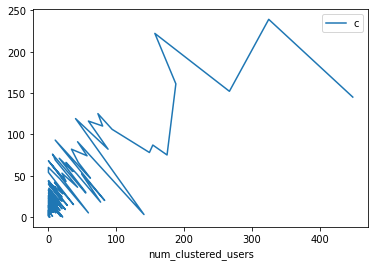

In [12]:
display(sorted_tool_count_for_unclassfied_users)
print("********************")
display(sorted_tool_count_for_clustered_users)
print("********************")

combined_df = sorted_tool_count_for_unclassfied_users.merge(
    sorted_tool_count_for_clustered_users, on = ['names_tools'], how='outer'
)
combined_df['num_unclassified_users'].fillna(0, inplace=True)
combined_df['num_clustered_users'].fillna(0, inplace=True)

combined_df['num_total_users'] = combined_df['num_unclassified_users'] + combined_df['num_clustered_users']
combined_df = combined_df.sort_values('num_total_users', ascending=False)


display(combined_df)

combined_df.plot(x='num_clustered_users', y='num_unclassified_users', label='c')

In [13]:
combined_df.to_csv('sorted_tool_count_for_combined_one_day_users.csv', index=False)

print(unclassied_counts['sbcnfet'])
print(clustered_counts['sbcnfet'])
display(combined_df.loc[combined_df['tool_name'] == 'sbcnfet'])

print(unclassied_counts['cenems'])
print(clustered_counts['cenems'])
display(combined_df.loc[combined_df['tool_name'] == 'cenems'])

# print(unclassied_counts['chemkinetics'])
print(clustered_counts['chemkinetics'])
display(combined_df.loc[combined_df['tool_name'] == 'chemkinetics'])

NameError: name 'unclassied_counts' is not defined

In [ ]:
import difflib
sm = difflib.SequenceMatcher(None, sorted_tools_unclassified_users, sorted_tools_clustered_users)
similarity_ratio = sm.ratio()

display(similarity_ratio)

In [ ]:
total_tools_count = len(sorted_tools_clustered_users + sorted_tools_unclassified_users)
common_tools_count = len(common_tools)

percentage_common_tools = (common_tools_count*100)/total_tools_count

display(percentage_common_tools)

In [ ]:
common_tools = list(set(sorted_tools_unclassified_users) & set(sorted_tools_clustered_users))

display(len(common_tools))
# display(common_tools)